# Workflow & Hyperparameter Optimization

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

🏠 Import the house price data set. We will keep only numerical features for the sake of simplicity

🎯 Your goal will be to fit the best KNN Regressor. In particular, how many "neighbors" (<font color=blue>K</font> in <font color=blue>K</font>NN) should you consider to get the best predictions for your house prices ?

In [2]:
# Load raw data
data = pd.read_csv('https://wagon-public-datasets.s3.amazonaws.com/houses_train_raw.csv', index_col="Id")

# Only keep numerical columns and raws without NaN
data = data.select_dtypes(include=np.number).dropna()

data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500


In [3]:
X = data.drop(columns=['SalePrice'])
y = data['SalePrice']

## 1. Train/Test split

❓ **Question (Holdout)**❓

👇 Split the dataset to create your `X_train` `X_test` and `y_train` `y_test`. Use:
- `test_size=0.3`
- `random_state=0` to compare your results with your buddy

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 2. Scaling

⚖️ Scaling is always crucially important for the KNN algorithm..

❓ **Question (Scaling)** ❓ 

* Scale your train set and test set.
* Here, let's simply apply the `StandardScaler` and not waste time choosing one scaler per feature. Indeed, the goals of this exercise are to:
    * review KNN
    * understand GridSearchCV
    * understand RandomizedSearchCV

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled, X_test_scaled

(array([[-0.87871936,  0.18688486, -0.06663489, ..., -0.14608468,
         -0.11071095,  0.16828509],
        [-0.87871936,  2.10800891,  0.11718506, ..., -0.14608468,
         -1.96535592, -0.57711328],
        [-0.87871936, -0.45348983, -0.53319134, ..., -0.14608468,
          0.26021804, -0.57711328],
        ...,
        [-0.87871936,  0.40034309, -0.20346947, ...,  3.97498424,
         -1.22349793, -1.32251165],
        [-0.14400627, -0.45348983, -0.3328853 , ..., -0.14608468,
         -0.48163994,  0.16828509],
        [-0.87871936, -0.45348983, -0.56946075, ..., -0.14608468,
         -0.11071095, -0.57711328]]),
 array([[ 2.54994175, -2.11846401, -1.56006891, ..., -0.14608468,
          0.63114704,  0.91368346],
        [ 0.1008981 , -0.53887312,  0.87925475, ..., -0.14608468,
          1.74393402, -1.32251165],
        [-0.87871936,  0.18688486, -0.39676892, ..., -0.14608468,
          1.00207603,  0.91368346],
        ...,
        [ 0.59070683,  0.18688486, -0.0076971 , ..., -

## 3. Baseline KNN model

❓ **Question (A baseline for our KNN)** ❓

Cross-validate (*cv = 5*) a simple KNN regressor taking into account only _the closest neighbor_, and compute the average score over the 5 folds.

In [8]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score

In [9]:
knn = KNeighborsRegressor(n_neighbors=1)
cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5).mean()
cv_scores

0.5601542887874071

## 4. GridSearch

### 4.1. A first GridSearch

❓ **Question (GridSearch v1)**❓

Let's use SKLearn `GridSearchCV` to find the best KNN hyperparameter `n_neighbors`.
- Start a coarse-grain approach, with `n_neighbors` = [1,5,10,20,50]
- 5-fold cross-validate each parameter
- Make sure to maximize your performance time using `n_jobs`

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
grid = {'n_neighbors': [1, 5, 10, 20, 50]}

# Instantiate Grid Search
search = GridSearchCV(
    knn, 
    grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
)

# Fit data to Grid Search
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50]}, scoring='r2')

❓ **Question (best parameters)** ❓

According to the GridSearch, what is the optimal K value?

In [11]:
optimal_k = search.best_params_['n_neighbors']
optimal_k

10

❓ **Question (scoring)** ❓ What is the best score the optimal K value produced?

In [12]:
best_score_k = search.best_score_
best_score_k

0.7596697382171873

### 4.2. A second GridSearch

❓ **Question (GridSearch V2)** ❓


Now, we have an idea about where the best $K$ lies, but some of the values we didn't try could result in a  better performance.

* Re-run a GridSearch trying some values for $K$ around to your previous best value
* What are the `best_score` and `best_k` for this refined GridSearch?

In [13]:
%%time
# Instantiate model
knn_b = KNeighborsRegressor()

# Hyperparameter Grid
grid_b = {'n_neighbors': [7, 8, 9, 10, 11, 12, 13]}

# Instantiate Grid Search
search_b = GridSearchCV(
    knn_b, 
    grid_b, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
)

# Fit data to Grid Search
search_b.fit(X_train_scaled, y_train)

CPU times: user 31.9 ms, sys: 10.1 ms, total: 42 ms
Wall time: 48.1 ms


GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [7, 8, 9, 10, 11, 12, 13]},
             scoring='r2')

In [14]:
best_k = search_b.best_params_['n_neighbors']
best_k

13

In [15]:
best_score = search_b.best_score_
best_score

0.7628734645391733

***🧪 Test your code***

In [16]:
from nbresult import ChallengeResult
result = ChallengeResult('knn',
                         best_k=best_k,
                         best_score=best_score)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/05-Model-Tuning/data-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_knn.py::TestKnn::test_best_k PASSED                                 [ 50%]
test_knn.py::TestKnn::test_best_score PASSED                             [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/knn.pickle

git commit -m 'Completed knn step'

git push origin master



### 4.3. Visual check (manual GridSearch)

☝️ This problem is actually simple enough to perform a GridSearch manually.

❓ **Question(Manual GridSearch)** ❓

- Loop manually over all values of $K$ from $1$ to $50$ and store the average of the cross-validated scores of each model in a list.
- Plot the scores as a function of $K$ to visually find the best $K$ using the `Elbow Method`

The elbow method is a common technique used to determine the optimal number of clusters (k) in k-means clustering. It’s a graphical approach that relies on the idea that as you increase the number of clusters, the sum of squared distances between points and their cluster centers (WCSS) will continue to decrease. This is because you’re essentially splitting the data into increasingly finer groups.

In [17]:
%%time
k_values = range(1, 51)
cv_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    cv_scores.append(cross_val_score(knn, X_train_scaled, y_train, cv=5).mean())

CPU times: user 2.08 s, sys: 694 ms, total: 2.77 s
Wall time: 631 ms


In [18]:
import matplotlib.pyplot as plt

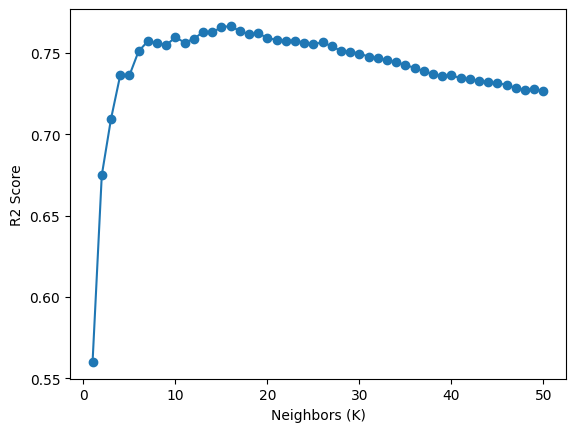

In [19]:
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Neighbors (K)')
plt.ylabel('R2 Score');

❓Can you guess what makes GridSearchCV a better option than such manual loop ?


<details>
    <summary>Answer</summary>

- Sklearn's `n_jobs=-1` allows you to parallelize the search, utilizing all of your CPU cores
- What if you had multiple hyper-parameters to co-optimize?
</details>

Permite ejecutar múltiples combinaciones de parámetros en paralelo mediante n_jobs=-1 (le estamos diciendo que utilice todos los nucleos, por ejemplo si le pones 1, 2, utiliza esta cantidad de nucleos) aprovechando todos los núcleos de la CPU. Esto reduce drásticamente el tiempo de ejecución en comparación con un bucle manual. 

## 5. GridSearch with multiple parameters

👩🏻‍🏫 KNNRegressor suppports various _distance metrics_ via the hyper-parameter `p` 

📚 [sklearn.neighbors.KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html)

❓ **Question (tuning multiple parameters)** ❓


* Use GridSearchCV to search for the best $K$ and $p$ simultaneously.
    * Try all combinations for $K = [1, 5, 10, 20, 50]$ and $p = [1, 2, 3]$. 

p = Power parameter for the Minkowski metric

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': [1, 5, 10, 20, 50],
    'p': [1,2,3]
}

# Instantiate Grid Search
search = GridSearchCV(
    knn, 
    grid, 
    cv=5, 
    scoring='r2', 
    n_jobs=-1,
)

# Fit data to Grid Search
search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=-1,
             param_grid={'n_neighbors': [1, 5, 10, 20, 50], 'p': [1, 2, 3]},
             scoring='r2')

❓ **Question (number of submodels)**❓

How many submodels did you train overall?

<details>
    <summary>Hint</summary>

Much more than 15. Think twice :)
    <details>
    <summary>Answer</summary>

75 models due to CV=5
</details>

In [21]:
number_of_submodels = 75 #5 valores de K * 3 valores de p * 5 cv = 75

❓ **Question (best parameters and best score after tuning the model with multiple parameters)**❓

What are the *best parameters* and the *best score*?

In [22]:
search.best_params_

{'n_neighbors': 10, 'p': 1}

In [23]:
search.best_score_

0.7969255879201194

## 6. Random Search

Now let's see whether a RandomizedSearch can find a better combination with the same number of models being fitted.

❓ **Question (RandomizedSearchCV)** ❓

Use `RandomizedSearchCV` to
- Randomly sample $K$ from a uniform `scipy.stats.randint(1,50)` ([doc](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.randint.html)) distribution
- Sample $p$ from a list $[1,2,3]$
- Use the correct numbers of `n_iter` and `cv` to fit the exact same numbers of models as in your previous GridSearchCV.

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [25]:
# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': randint(1, 50),
    'p': [1, 2, 3]
}

# Instantiate Random Search
search = RandomizedSearchCV(
    knn,
    grid,
    scoring='r2',
    n_iter=75,
    cv = 5,
    n_jobs=-1,
)

#Fit data to Random Search
search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=75, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f672e7b80>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [26]:
search.best_estimator_

KNeighborsRegressor(n_neighbors=9, p=1)

In [32]:
search.best_score_

0.7974801437687364

## 7. Generalization

❓ **Question (finetuning your model one more time)**❓

- Refine your RandomsearchCV if you want
- Choose your best model

In [38]:
# Instantiate model
knn = KNeighborsRegressor()

# Hyperparameter Grid
grid = {
    'n_neighbors': randint(5, 15),
    'p': [1, 2, 3]
}

# Instantiate Random Search
search = RandomizedSearchCV(
    knn,
    grid,
    scoring='r2',
    n_iter=75,
    cv = 5,
    n_jobs=-1,
)

#Fit data to Random Search
search.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(), n_iter=75, n_jobs=-1,
                   param_distributions={'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f6f67377010>,
                                        'p': [1, 2, 3]},
                   scoring='r2')

In [39]:
search.best_estimator_

KNeighborsRegressor(n_neighbors=6, p=1)

In [40]:
search.best_score_

0.7978787384801239

Now try to display your `cv_results` as a `DataFrame`, this will help you visualize what's going on inside the CV! 😉

In [58]:
from sklearn.model_selection import cross_validate

In [59]:
best_model = KNeighborsRegressor(n_neighbors=9, p=1)

In [60]:
cv_results = cross_validate(best_model, X_train_scaled, y_train, cv=5)
cv_results = pd.DataFrame(cv_results)
cv_results

,fit_time,score_time,test_score
0,0.001144,0.003188,0.762593
1,0.000651,0.002177,0.823336
2,0.000454,0.002054,0.741549
3,0.000402,0.001998,0.867283
4,0.000391,0.002297,0.792639


❓ **Question (Evaluation of the "best" model)** ❓

* Time has come to discover our model's performance with "best params" on the **unseen** test set `X_test`.
    * Compute the r2 score for the test set and save it as `r2_test`.

In [61]:
r2_test  = cross_val_score(best_model, X_train_scaled, y_train, cv=5).mean()
r2_test

0.7974801437687364

❓ **Question (Taking a step back)** ❓

Would you consider the optimized model to generalize well?

<details><summary>Answer</summary>

Test score may decrease a bit with train set. Probably not more than 5%. This can be due to
- A non-representative train/test split
- A cross-val number too small leading to overfitting the model-tuning phase. The more you cross-validated, the more robust your findings will generalize - but you can't increase cv too much if your dataset is too small as you won't keep enough observations in each fold to be representative.
- Our dataset is very small and our hyperparameter optimization is thus extremely dependent (and overfitting) on our train/test split. Always make sure your dataset is much bigger than the total number of hyperparameter combinations you are trying out!
    
</details>

***🧪 Test your code***

In [62]:
from nbresult import ChallengeResult
result = ChallengeResult('r2', 
                         r2_test=r2_test)
result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /root/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /root/code/MonicaVenzor/05-ML/05-Model-Tuning/data-workflow/tests
plugins: anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_r2.py::TestR2::test_r2 PASSED                                       [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/r2.pickle

git commit -m 'Completed r2 step'

git push origin master



🏁 Congratulations! Now, you know how to finetune a model using either a GridSearchCV or a RandomizedSearchCV 

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!